# 해시태그 데이터로 워드클라우드 만들기

In [3]:
import pandas as pd
raw_df = pd.read_csv('제주핫플레이스.csv')
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [4]:
tags = raw_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [5]:
tags[2:-2].split("', '")[:5]

['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [6]:
a = ['#시작']
a.extend(tags[2:-2].split("', '")[:5])
a

['#시작', '#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [7]:
tags_total = []
for tags in raw_df.tags:
    tags_total.extend(tags[2:-2].split("', '"))

## 해시태그 출현 빈도
    - collections 모듈

In [9]:
from collections import Counter, OrderedDict

In [10]:
s = 'A quick brown'
Counter(s)

Counter({'A': 1,
         ' ': 2,
         'q': 1,
         'u': 1,
         'i': 1,
         'c': 1,
         'k': 1,
         'b': 1,
         'r': 1,
         'o': 1,
         'w': 1,
         'n': 1})

In [11]:
sl = ['A', 'quick', 'brown', 'brown']
Counter(sl)

Counter({'A': 1, 'quick': 1, 'brown': 2})

In [12]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d

{'x': 1, 'k': 2, 'm': 3}

In [13]:
od = OrderedDict()
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [14]:
for k, v in od.items():
    print(k, v)

x 1
k 2
m 3


- 해시태그 빈도 집계

In [15]:
tag_counts = Counter(tags_total)

In [16]:
# Top 50
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#반영구', 405),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주자연눈썹', 397)]

In [17]:
# 데이터 정제하기
stopwords = ['#jeju','#일상','','#제주','#제주도','#선팔','#제주눈썹문신',
             '#서귀포눈썹문신', '#반영구', '#눈썹문신', '#제주자연눈썹',
             '#제주속눈썹', '#서귀포남자눈썹문신', '#서귀포자연눈썹', '#제주남자눈썹문신', 
             '#서귀포속눈썹', '#서귀포반영구']
'''tag_total_refined = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_refined.append(tag)'''
tags_total = [tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#먹스타그램', 395),
 ('#맞팔', 388),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#소통', 374),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343)]

# 워드 클라우드 만들기

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

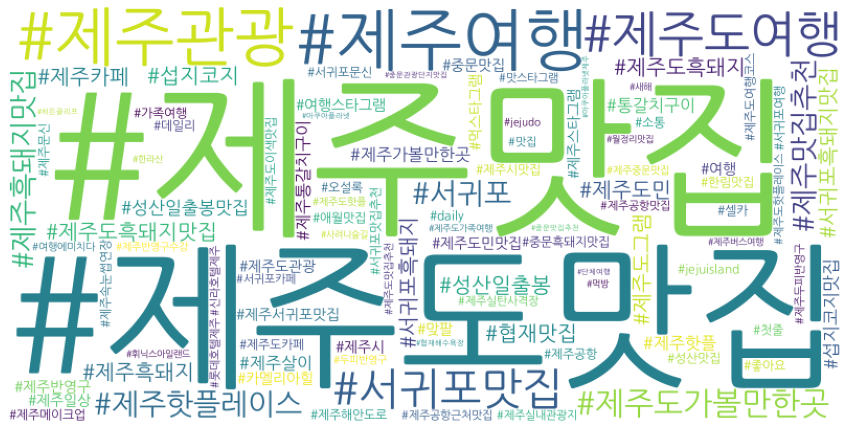

In [21]:
path = 'data/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()